In [465]:
import numpy as np
import pandas as pd

#pd.set_option('display.max_rows', 10000)

In [466]:
treino = pd.read_csv('train.csv')
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sempre legal dar uma olhada nas estatísticas do data frame. Aqui já temos noção de como os dados estão, por exemplo se tem Age negativos, ou a Age com mais de 200 anos.. ja pensou?

In [467]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Depois que a gente conheceu os dados de treino, vamos ver sem tem features com valures NULL

In [468]:
treino.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

Idade nula é um porblema. Vamos resolver isso assim: Subsituir os nulos pela média, mas vamos fazer de forma aleatória levando em conta o range dentro do desvio padrão.

In [469]:
media = treino['Age'].mean()
desvio = treino['Age'].std()
total_nulos = treino['Age'].isnull().sum()

# Cria um array com a quantidade de Ages em branco
total_nulos_randomicos = np.random.random_integers(media-desvio, media+desvio,size=total_nulos)
# Aplica o array nos registros do data frame
treino['Age'][np.isnan(treino['Age'])] = total_nulos_randomicos


In [471]:
# Vamos ver se deu bom...
treino['Age'].isnull().sum()

0

O campo sexo precisa ser transformado em binário.

In [472]:
# Tratamentos
treino['Sex_binario'] = treino['Sex'].apply(lambda x: 1 if x == 'female' else 0)


Vamos jogar os caras null para -1

In [473]:
treino.fillna(value=-1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,-1,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,36.0,1,2,W./C. 6607,23.4500,-1,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


Vamos criar umas features... pensar em algumas hipóteses.

In [474]:
# Se reparar nos nomes, existem alguns títulos.
treino['is_mr'] = treino['Name'].str.contains('Mr.')
treino['is_mrs'] = treino['Name'].str.contains('Mrs.')
treino['is_miss'] = treino['Name'].str.contains('Miss.')
treino['is_rev'] = treino['Name'].str.contains('Rev.')
treino['is_master'] = treino['Name'].str.contains('Master.')
treino['is_dr'] = treino['Name'].str.contains('Dr.')

# Junta a informação se o passageiro esta sozinho, com filhos e/ou marido. Seria o total de pessoas da familia viajando juntos, algo assim.
treino['relatives'] = treino.apply(lambda row: int(row['SibSp'] + row['Parch'])>0, axis=1)

# Uma classificação por faixa etária
treino['faixa_idade'] = treino['Age']/12
# Se é criança
treino['is_children'] = treino.apply(lambda row: row['Age']<15, axis=1)
# Se é idoso
treino['is_old'] = treino.apply(lambda row: row['Age']>60, axis=1)
# Prmeira letra da cabine, imaginei que isso pode influenciar pelo fato de estar no inicio/final de corredor, andar diferente, enfim... 
treino['cabin_fst_letter'] = treino['Cabin'].str[0:1]
treino['cabin_fst_letter'].replace(np.nan, -1, inplace=True) # soh acerta o que ficou como NULL

Muito importante dar um check na correlação das variáveis com o nosso target. Vamos usar isso para limpar o data frame ou para excluir alguma feature na hora da predição.

In [475]:
treino.corr().abs()[["Survived"]]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.049189
SibSp,0.035322
Parch,0.081629
Fare,0.257307
Sex_binario,0.543351
is_mr,0.332993
is_mrs,0.344223


In [476]:
# Pinto os nomes das colunas pra conseguir copiar e colar abaixo :)
treino.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario',
       'is_mr', 'is_mrs', 'is_miss', 'is_rev', 'is_master', 'is_dr',
       'relatives', 'faixa_idade', 'is_children', 'is_old',
       'cabin_fst_letter'], dtype=object)

In [480]:
# Vou usar essas colunas como preditoras
colunas = ['Sex_binario', 'Pclass', 'Age', 'SibSp', 'Parch',  'Embarked', 'Fare',
           'is_mr', 'is_mrs', 'is_miss', 'is_rev', 'is_master',
            'is_dr', 'relatives', 'cabin_fst_letter', 'faixa_idade',
            'is_children', 'is_old'
]

In [481]:
# Transformo algumas features categoricas
for coluna in ['Cabin', 'Embarked', 'cabin_fst_letter']:
    treino[coluna]=pd.Categorical(treino[coluna]).codes

Agora sim, vamos pa predição

In [489]:
entradas = colunas
saida = 'Survived'

X = treino[entradas]
y = treino[saida]

X = X.fillna(-1)

from sklearn.model_selection import train_test_split


In [490]:
# validacao cruzada
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
print('Colunas:', X.columns.values)
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
modelo = RandomForestClassifier(n_estimators=1000, n_jobs=-1,random_state=1, max_depth=50)
for linhas_treino, linhas_teste in kf.split(X):

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_teste]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_teste]
    
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    print('Acuracia: ', acc)
    resultados.append(acc)
        
print('Media acuracia:',  np.mean(resultados))


Colunas: ['Sex_binario' 'Pclass' 'Age' 'SibSp' 'Parch' 'Embarked' 'Fare' 'is_mr'
 'is_mrs' 'is_miss' 'is_rev' 'is_master' 'is_dr' 'relatives'
 'cabin_fst_letter' 'faixa_idade' 'is_children' 'is_old']
Acuracia:  0.7959641255605381
Acuracia:  0.8
Acuracia:  0.7914798206278026
Acuracia:  0.7955056179775281
Acuracia:  0.8139013452914798
Acuracia:  0.8134831460674158
Acuracia:  0.7892376681614349
Acuracia:  0.7932584269662921
Acuracia:  0.7937219730941704
Acuracia:  0.8
Acuracia:  0.7869955156950673
Acuracia:  0.7910112359550562
Acuracia:  0.7914798206278026
Acuracia:  0.7955056179775281
Acuracia:  0.7869955156950673
Acuracia:  0.8112359550561797
Acuracia:  0.8340807174887892
Acuracia:  0.8067415730337079
Acuracia:  0.7937219730941704
Acuracia:  0.8089887640449438
Media acuracia: 0.7996654406207487


In [503]:
# Vamos fazer uma ultima rodada para mostrar a matriz de confuzao
from sklearn.metrics import confusion_matrix

X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.7, random_state=0)

modelo.fit(X_treino, y_treino)
predict = modelo.predict(X_validacao)
cf_matrix = confusion_matrix(y_validacao, predict)
print(cf_matrix)

[[311  83]
 [ 54 176]]


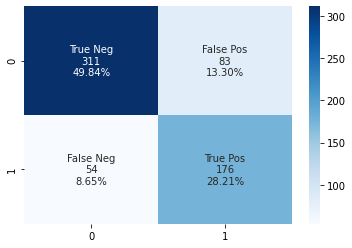

In [507]:
import seaborn as sns

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')